# Proyecto ETL COVID-19 (API Pública)
### Autor: Andres Llumiquinga
### Objetivo: Extraer, transformar y cargar datos de COVID-19 en EE. UU. usando Python

## Preguntas

1.   ¿Cómo ha evolucionado la pandemia en el tiempo?
2.   ¿Cuál ha sido la capacidad del sistema hospitalario?
3.   ¿Cuántos tests se hacían por día y cuál era el porcentaje de positividad?
4.   ¿Cuál es la tendencia de fallecidos?


## 1. Extracción de datos desde la API

In [61]:
import requests
import pandas as pd

url = "https://api.covidtracking.com/v1/us/daily.json"

def extraer_datos(url):
    response = requests.get(url)
    return response.json()

data = extraer_datos(url)

## 2. Transformación de los datos

In [62]:
def transformar_datos(data):
    df = pd.json_normalize(data)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    columns = [
    'date',
    'positive',
    'positiveIncrease',
    'death',
    'deathIncrease',
    'hospitalizedCurrently',
    'hospitalizedCumulative',
    'inIcuCurrently',
    'onVentilatorCurrently',
    'totalTestResults',
    'totalTestResultsIncrease',
    'recovered',
    'states']
    df = df[columns]

    # Reemplazar valores negativos con NaN
    for col in df.select_dtypes(include=['float', 'int']).columns:
        df[col] = df[col].map(lambda x: None if x < 0 else x)

    # Rellenar nulos si aplica
    df['recovered'] = df['recovered'].fillna(0).astype(int)
    df['positive'] = df['positive'].fillna(0).astype(int)
    df['death'] = df['death'].fillna(0).astype(int)
    df['positihospitalizedCurrentlyve'] = df['hospitalizedCurrently'].fillna(0).astype(int)
    df['hospitalizedCumulative'] = df['hospitalizedCumulative'].fillna(0).astype(int)
    df['inIcuCurrently'] = df['inIcuCurrently'].fillna(0).astype(int)
    df['onVentilatorCurrently'] = df['onVentilatorCurrently'].fillna(0).astype(int)
    df['hospitalizedCurrently'] = df['hospitalizedCurrently'].fillna(0).astype(int)

    # Eliminar filas con datos totalmente vacíos
    df = df.dropna(how='all')
    df = df.sort_values('date', ascending=False)

    df_limpio = df[df['positive'] != 0]
    return df_limpio

df = transformar_datos(data)

/tmp/ipython-input-62-324611521.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recovered'] = df['recovered'].fillna(0).astype(int)


## 3. Análisis exploratorio

In [63]:
# Visualización de Extructura
print(df.shape)
df.head()

(414, 14)


,date,positive,positiveIncrease,death,deathIncrease,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,totalTestResults,totalTestResultsIncrease,recovered,states,positihospitalizedCurrentlyve
0,2021-03-07,28756489,41835,515151,842,40199,776361,8134,2802,363825123,1170059,0,56,40199
1,2021-03-06,28714654,60015,514309,1680,41401,775635,8409,2811,362655064,1430992,0,56,41401
2,2021-03-05,28654639,68787,512629,2221,42541,775132,8634,2889,361224072,1744417,0,56,42541
3,2021-03-04,28585852,65487,510408,1743,44172,772351,8970,2973,359479655,1590984,0,56,44172
4,2021-03-03,28520365,66836,508665,2449,45462,770821,9359,3094,357888671,1406795,0,56,45462


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 413
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           414 non-null    datetime64[ns]
 1   positive                       414 non-null    int64         
 2   positiveIncrease               414 non-null    int64         
 3   death                          414 non-null    int64         
 4   deathIncrease                  414 non-null    int64         
 5   hospitalizedCurrently          414 non-null    int64         
 6   hospitalizedCumulative         414 non-null    int64         
 7   inIcuCurrently                 414 non-null    int64         
 8   onVentilatorCurrently          414 non-null    int64         
 9   totalTestResults               414 non-null    int64         
 10  totalTestResultsIncrease       414 non-null    int64         
 11  recovered               

In [65]:
df.columns

Index(['date', 'positive', 'positiveIncrease', 'death', 'deathIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'onVentilatorCurrently', 'totalTestResults', 'totalTestResultsIncrease',
       'recovered', 'states', 'positihospitalizedCurrentlyve'],
      dtype='object')

In [66]:
# Verificacion de nulos y tipos de datos
df.isnull().sum().sort_values(ascending=False)

,0
date,0
positive,0
positiveIncrease,0
death,0
deathIncrease,0
hospitalizedCurrently,0
hospitalizedCumulative,0
inIcuCurrently,0
onVentilatorCurrently,0
totalTestResults,0


In [67]:
df

,date,positive,positiveIncrease,death,deathIncrease,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,totalTestResults,totalTestResultsIncrease,recovered,states,positihospitalizedCurrentlyve
0,2021-03-07,28756489,41835,515151,842,40199,776361,8134,2802,363825123,1170059,0,56,40199
1,2021-03-06,28714654,60015,514309,1680,41401,775635,8409,2811,362655064,1430992,0,56,41401
2,2021-03-05,28654639,68787,512629,2221,42541,775132,8634,2889,361224072,1744417,0,56,42541
3,2021-03-04,28585852,65487,510408,1743,44172,772351,8970,2973,359479655,1590984,0,56,44172
4,2021-03-03,28520365,66836,508665,2449,45462,770821,9359,3094,357888671,1406795,0,56,45462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2020-01-23,2,0,0,0,0,0,0,0,2,1,0,2,0
410,2020-01-22,2,0,0,0,0,0,0,0,1,1,0,2,0
411,2020-01-21,2,1,0,0,0,0,0,0,0,0,0,1,0
412,2020-01-20,1,0,0,0,0,0,0,0,0,0,0,1,0


In [69]:
# Calcular el número de NaNs por columna
nan_counts = df.isna().sum()

print("Conteo de NaNs por columna:")
for col, count in nan_counts.items():
    print(f"- {col}: {count} NaNs")

Conteo de NaNs por columna:
- date: 0 NaNs
- positive: 0 NaNs
- positiveIncrease: 0 NaNs
- death: 0 NaNs
- deathIncrease: 0 NaNs
- hospitalizedCurrently: 0 NaNs
- hospitalizedCumulative: 0 NaNs
- inIcuCurrently: 0 NaNs
- onVentilatorCurrently: 0 NaNs
- totalTestResults: 0 NaNs
- totalTestResultsIncrease: 0 NaNs
- recovered: 0 NaNs
- states: 0 NaNs
- positihospitalizedCurrentlyve: 0 NaNs


## 4. Validación y verificación

In [71]:
#Validación de calidad de datos (DQ checks)
assert df.duplicated(subset=['date']).sum() == 0, "Fechas duplicadas detectadas"
assert df['positive'].min() >= 0, "Valores negativos en positivos"

## 5. Carga en base de datos SQLite

In [73]:
#Load
import sqlite3

def cargar_en_sqlite(df, ruta_db='covid_us.db'):
    conn = sqlite3.connect(ruta_db)
    df.to_sql('casos_covid', conn, if_exists='replace', index=False)
    conn.close()
    print("Base de datos creada exitosamente.")


In [74]:
cargar_en_sqlite(df)

Base de datos creada exitosamente.


In [57]:
#Descargar en Csv
df.to_csv("covid_us_clean.csv", index=False)

#RESPUESTAS

##1 ¿Cómo ha evolucionado la pandemia en el tiempo?

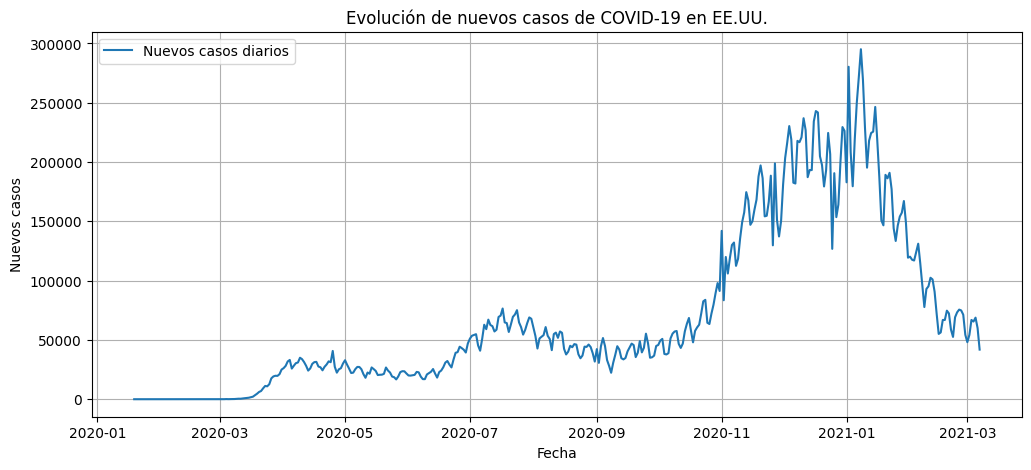

In [72]:
import matplotlib.pyplot as plt

# Ordenar por fecha
df = df.sort_values('date')

# Graficar nuevos casos diarios
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['positiveIncrease'], label='Nuevos casos diarios')
plt.title('Evolución de nuevos casos de COVID-19 en EE.UU.')
plt.xlabel('Fecha')
plt.ylabel('Nuevos casos')
plt.grid(True)
plt.legend()
plt.show()



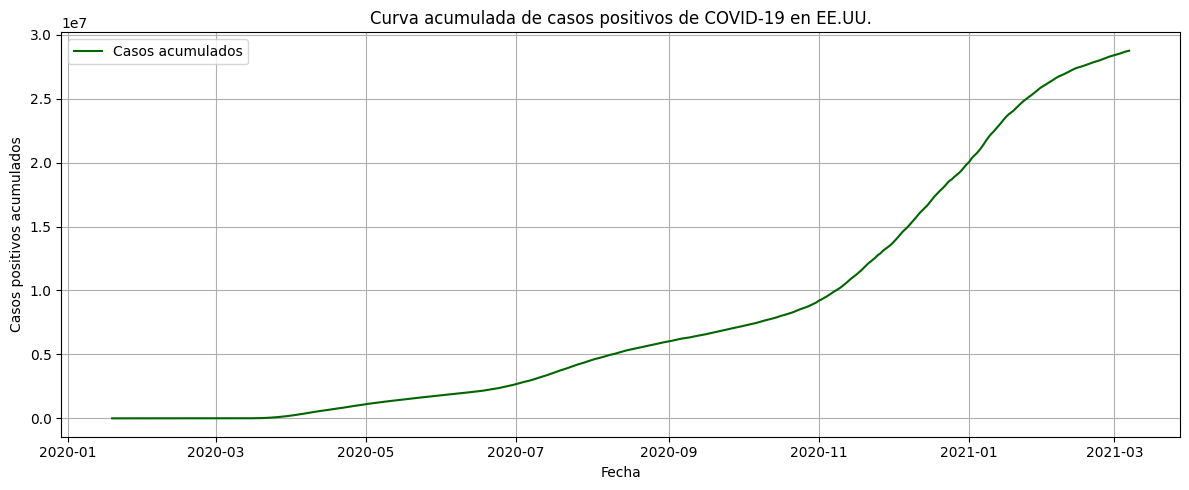

In [52]:
import matplotlib.pyplot as plt

# Gráfico de casos acumulados
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['positive'], color='darkgreen', label='Casos acumulados')
plt.title('Curva acumulada de casos positivos de COVID-19 en EE.UU.')
plt.xlabel('Fecha')
plt.ylabel('Casos positivos acumulados')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##2 ¿Cuál ha sido la capacidad del sistema hospitalario?

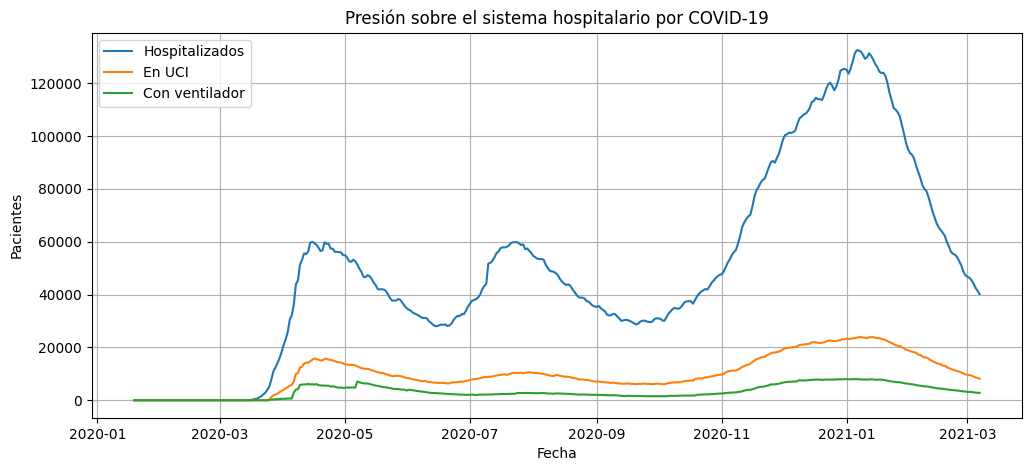

In [53]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['hospitalizedCurrently'], label='Hospitalizados')
plt.plot(df['date'], df['inIcuCurrently'], label='En UCI')
plt.plot(df['date'], df['onVentilatorCurrently'], label='Con ventilador')
plt.title('Presión sobre el sistema hospitalario por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Pacientes')
plt.grid(True)
plt.legend()
plt.show()


##3 ¿Cuántos tests se hacían por día y cuál era el porcentaje de positividad?

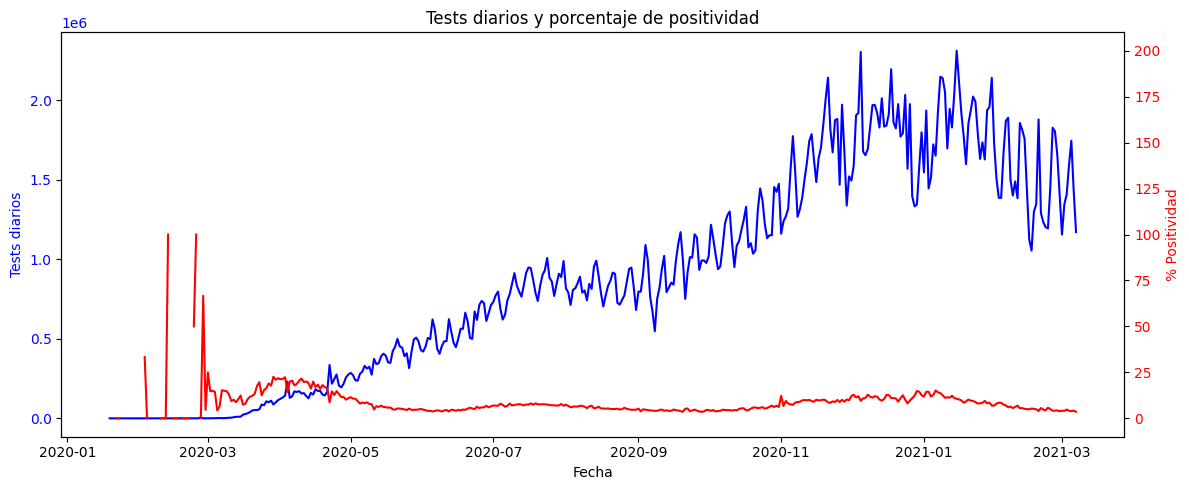

In [54]:
# Calcular porcentaje de positividad diario
df['positividad'] = (df['positiveIncrease'] / df['totalTestResultsIncrease']) * 100

# Graficar tests diarios y positividad
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Tests diarios', color='blue')
ax1.plot(df['date'], df['totalTestResultsIncrease'], color='blue', label='Tests diarios')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('% Positividad', color='red')
ax2.plot(df['date'], df['positividad'], color='red', label='% Positividad')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Tests diarios y porcentaje de positividad')
fig.tight_layout()
plt.show()


#4 ¿Cuál es la tendencia de fallecidos?

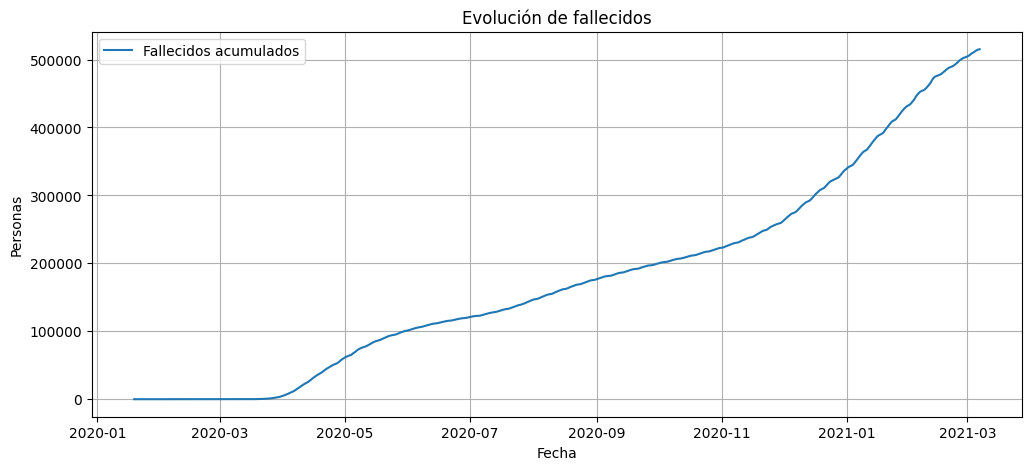

In [56]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['death'], label='Fallecidos acumulados')
plt.title('Evolución de fallecidos')
plt.xlabel('Fecha')
plt.ylabel('Personas')
plt.legend()
plt.grid(True)
plt.show()
